Immobilier en France

Le dataset comprend les tables suivantes :

- actifs_financiers.csv
- flux_nouveaux_emprunts.csv
- foyers_fiscaux.csv
- indice_reference_loyers.csv
- loyers.csv
- parc_immobilier.csv
- taux_endettement.csv
- taux_interet.csv
- transactions.npz
- transactions_sample.csv

Le projet a pour but de mettre en évidence des corrélations entre les taux d'intêrets, les nombres de transactions et le prix de l'immobilier selon les régions de France.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importation des données

In [3]:
actifs_financiers = pd.read_csv('data/actifs_financiers.csv')
flux_nouveaux_emprunts = pd.read_csv('data/flux_nouveaux_emprunts.csv')
foyers_fiscaux = pd.read_csv('data/foyers_fiscaux.csv')
indice_reference_loyers = pd.read_csv('data/indice_reference_loyers.csv')
loyers = pd.read_csv('data/loyers.csv')
parc_immobilier = pd.read_csv('data/parc_immobilier.csv')
taux_endettement = pd.read_csv('data/taux_endettement.csv')
taux_interet = pd.read_csv('data/taux_interet.csv')
transactions_samples = pd.read_csv('data/transactions_sample.csv')

C:\Users\geoff\AppData\Local\Temp\ipykernel_21164\1217552574.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  foyers_fiscaux = pd.read_csv('data/foyers_fiscaux.csv')


### Data cleaning par dataframe

#### Actifs_financiers

Les données proviennent du site de l'OCDE : https://data.oecd.org/fr/hha/actifs-financiers-des-menages.htm#indicator-chart<br>
Elles représentent l'évolution de l'épargne des français en répartissant le type d'épargne de 1995 à 2022

In [4]:
actifs_financiers.head()

,date,USD_par_habitant,euros_par_habitant,fraction_depot_banque,fraction_assurance_vie,fraction_fonds_communs,fraction_fond_pension,fraction_titres_non_action,fraction_actions
0,1995,30123.404348,39040.235465,0.384888,0.188776,0.119057,0.0,0.064038,0.162191
1,1996,35392.234872,44320.942790,0.342184,0.191061,0.098610,0.0,0.050184,0.249702
2,1997,38382.264726,43416.823656,0.337222,0.210199,0.090571,0.0,0.041439,0.248913
3,1998,41095.798163,46121.721142,0.330956,0.220324,0.093650,0.0,0.038179,0.250924
4,1999,46373.333179,49427.234995,0.306527,0.222528,0.094865,0.0,0.028746,0.282137


In [5]:
actifs_financiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        28 non-null     int64  
 1   USD_par_habitant            28 non-null     float64
 2   euros_par_habitant          28 non-null     float64
 3   fraction_depot_banque       28 non-null     float64
 4   fraction_assurance_vie      28 non-null     float64
 5   fraction_fonds_communs      28 non-null     float64
 6   fraction_fond_pension       28 non-null     float64
 7   fraction_titres_non_action  28 non-null     float64
 8   fraction_actions            28 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 2.1 KB


In [6]:
actifs_financiers.describe()

,date,USD_par_habitant,euros_par_habitant,fraction_depot_banque,fraction_assurance_vie,fraction_fonds_communs,fraction_fond_pension,fraction_titres_non_action,fraction_actions
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,28.000000
mean,2008.500000,74451.933347,88752.425582,0.300412,0.299427,0.075435,0.0,0.023068,0.223151
std,8.225975,31152.116636,36565.995689,0.025667,0.054898,0.018536,0.0,0.013977,0.028502
min,1995.000000,30123.404348,39040.235465,0.270266,0.188776,0.046145,0.0,0.005365,0.162191
25%,2001.750000,48708.074381,48600.856532,0.284113,0.267014,0.063020,0.0,0.013437,0.199741
50%,2008.500000,68873.834174,95034.274909,0.292486,0.315935,0.076343,0.0,0.020951,0.223010
75%,2015.250000,93302.629739,112039.485321,0.310673,0.342261,0.089583,0.0,0.029519,0.249111
max,2022.000000,137486.916044,162520.645718,0.384888,0.367581,0.119057,0.0,0.064038,0.282137


In [7]:
actifs_financiers.shape

(28, 9)

In [8]:
actifs_financiers['date']=pd.to_datetime(actifs_financiers['date'], format='%Y').dt.year


In [9]:
actifs_financiers.head()

,date,USD_par_habitant,euros_par_habitant,fraction_depot_banque,fraction_assurance_vie,fraction_fonds_communs,fraction_fond_pension,fraction_titres_non_action,fraction_actions
0,1995,30123.404348,39040.235465,0.384888,0.188776,0.119057,0.0,0.064038,0.162191
1,1996,35392.234872,44320.942790,0.342184,0.191061,0.098610,0.0,0.050184,0.249702
2,1997,38382.264726,43416.823656,0.337222,0.210199,0.090571,0.0,0.041439,0.248913
3,1998,41095.798163,46121.721142,0.330956,0.220324,0.093650,0.0,0.038179,0.250924
4,1999,46373.333179,49427.234995,0.306527,0.222528,0.094865,0.0,0.028746,0.282137


Text(0.5, 1.0, "Evolution de l'épargne en France")

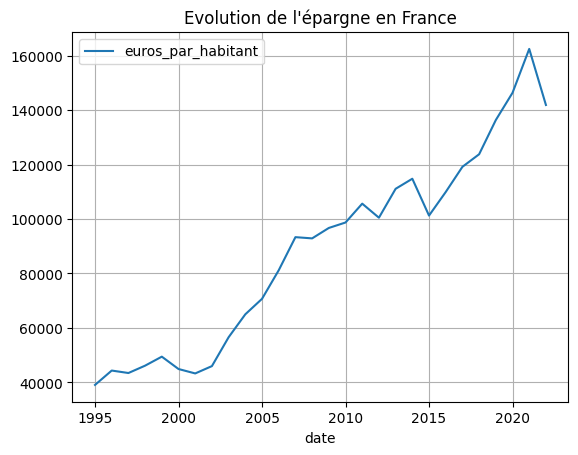

In [10]:
# evolution de l'épargne
actifs_financiers.plot(x='date', y='euros_par_habitant')
plt.grid()
plt.title("Evolution de l'épargne en France")

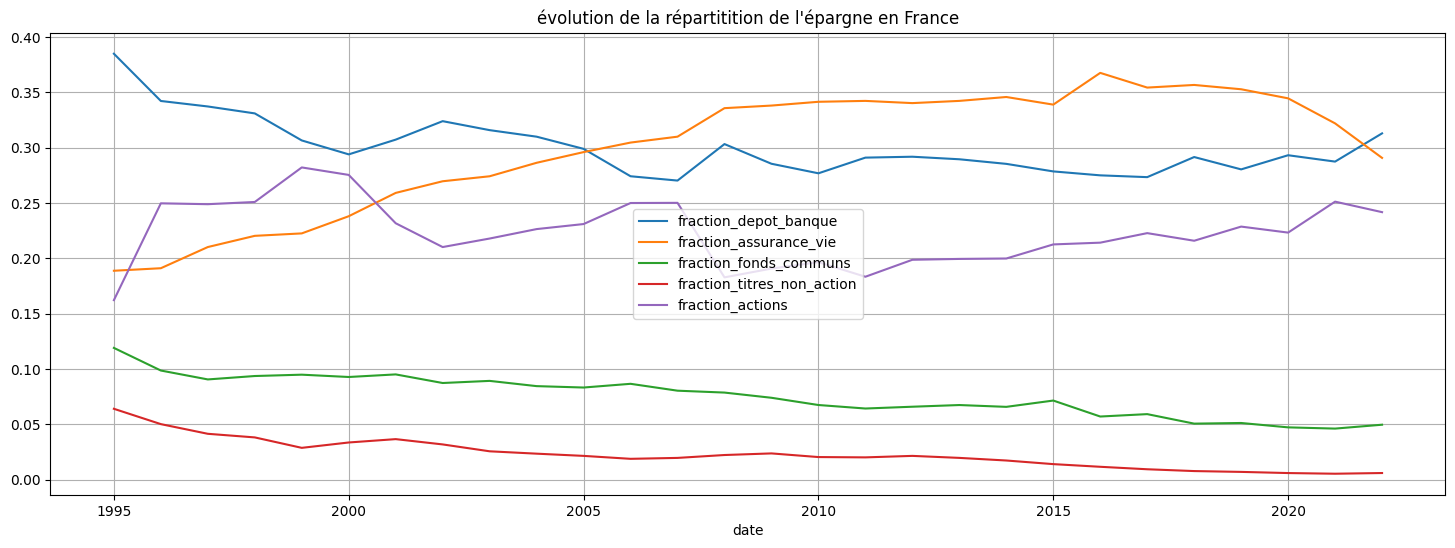

In [11]:
# répartition de l'épargne

data = ['fraction_depot_banque', 'fraction_assurance_vie', 'fraction_fonds_communs', 'fraction_titres_non_action', 'fraction_actions']
actifs_financiers.plot(x='date', y=data, figsize=(18,6))
plt.grid()
plt.title("évolution de la répartitition de l'épargne en France")
plt.legend(loc='center')
plt.show()



### Flux_nouveaux_emprunts

In [12]:
flux_nouveaux_emprunts.head()

,date,emprunts_M€
0,2023-10-31,11877
1,2023-09-30,11439
2,2023-08-31,13580
3,2023-07-31,15168
4,2023-06-30,16035


In [13]:
flux_nouveaux_emprunts.shape

(161, 2)

In [14]:
flux_nouveaux_emprunts.dtypes

date           object
emprunts_M€     int64
dtype: object

In [15]:
flux_nouveaux_emprunts.describe()

,emprunts_M€
count,161.000000
mean,17990.788820
std,6850.819439
min,6341.000000
25%,12924.000000
50%,17171.000000
75%,23149.000000
max,39062.000000


In [16]:
flux_nouveaux_emprunts['date'] = pd.to_datetime(flux_nouveaux_emprunts['date'], format='%Y-%m-%d')

Text(0, 0.5, "Montant des prêts accordé en Millions d'euros")

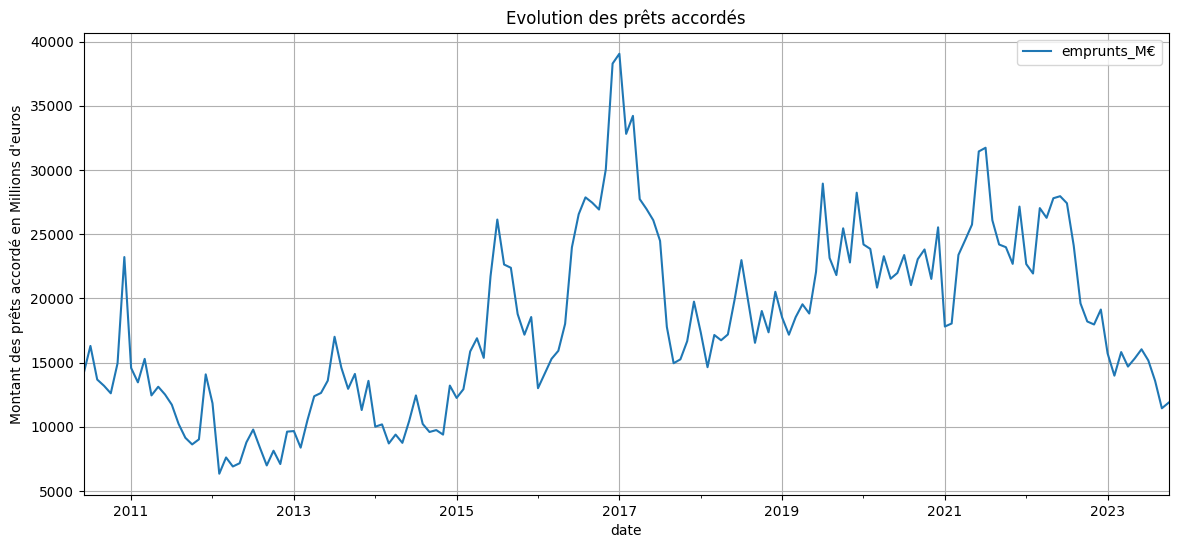

In [17]:
flux_nouveaux_emprunts.plot(x='date', y='emprunts_M€', figsize=(14,6))
plt.title("Evolution des prêts accordés")
plt.grid()
plt.ylabel("Montant des prêts accordé en Millions d'euros")

### foyers_fiscaux

In [18]:
foyers_fiscaux.head()

,date,departement,id_ville,ville,n_foyers_fiscaux,revenu_fiscal_moyen,montant_impot_moyen,n_foyers_0k_10k,n_foyers_10k_12k,n_foyers_12k_15k,n_foyers_15k_20k,n_foyers_20k_30k,n_foyers_30k_50k,n_foyers_50k_100k,n_foyers_100k_plus
0,2021,01,1,L'Abergement-Clémenciat,474.0,32584.33,1820.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,01,2,L'Abergement-de-Varey,141.0,33196.77,1895.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,01,4,Ambérieu-en-Bugey,9140.0,26034.55,1330.46,1836.0,509.0,801.0,1655.0,1838.0,1580.0,811.0,110.0
3,2021,01,5,Ambérieux-en-Dombes,1066.0,33662.97,2067.19,120.0,41.0,75.0,186.0,228.0,256.0,129.0,31.0
4,2021,01,6,Ambléon,74.0,26522.22,1375.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
foyers_fiscaux.shape

(280688, 15)

In [20]:
foyers_fiscaux.describe()

,date,id_ville,n_foyers_fiscaux,revenu_fiscal_moyen,montant_impot_moyen,n_foyers_0k_10k,n_foyers_10k_12k,n_foyers_12k_15k,n_foyers_15k_20k,n_foyers_20k_30k,n_foyers_30k_50k,n_foyers_50k_100k,n_foyers_100k_plus
count,280688.000000,280688.000000,280204.000000,279925.000000,279916.000000,45024.000000,43407.000000,45023.000000,45025.000000,45025.000000,45025.000000,41074.000000,39473.000000
mean,2017.485389,250.638371,1045.473152,25907.524207,1298.169985,1177.598925,276.638975,430.203296,794.300944,929.113248,878.614059,520.354093,136.966787
std,2.294820,180.644148,5025.684033,7050.929688,1117.375900,3285.273243,613.547971,944.993157,1734.083192,2109.602228,1821.123525,1226.897065,568.472056
min,2014.000000,1.000000,11.000000,3006.740000,-872.000000,60.000000,12.000000,17.000000,17.000000,38.000000,14.000000,16.000000,11.000000
25%,2015.000000,105.000000,112.000000,21463.310000,689.797500,238.000000,79.000000,126.000000,231.000000,264.000000,288.000000,134.000000,20.000000
50%,2017.000000,217.000000,248.000000,24665.530000,1022.710000,396.000000,123.000000,194.000000,352.000000,400.000000,422.000000,226.000000,36.000000
75%,2019.000000,360.000000,622.000000,28829.220000,1546.022500,829.000000,235.000000,364.500000,670.000000,752.000000,776.000000,441.000000,84.000000
max,2021.000000,909.000000,303148.000000,229272.630000,42100.900000,85638.000000,15543.000000,24701.000000,44425.000000,55918.000000,43890.000000,27264.000000,21123.000000


In [21]:
foyers_fiscaux.isnull().sum()

date                        0
departement                 0
id_ville                    0
ville                       0
n_foyers_fiscaux          484
revenu_fiscal_moyen       763
montant_impot_moyen       772
n_foyers_0k_10k        235664
n_foyers_10k_12k       237281
n_foyers_12k_15k       235665
n_foyers_15k_20k       235663
n_foyers_20k_30k       235663
n_foyers_30k_50k       235663
n_foyers_50k_100k      239614
n_foyers_100k_plus     241215
dtype: int64

In [22]:
foyers_fiscaux.dtypes

date                     int64
departement             object
id_ville                 int64
ville                   object
n_foyers_fiscaux       float64
revenu_fiscal_moyen    float64
montant_impot_moyen    float64
n_foyers_0k_10k        float64
n_foyers_10k_12k       float64
n_foyers_12k_15k       float64
n_foyers_15k_20k       float64
n_foyers_20k_30k       float64
n_foyers_30k_50k       float64
n_foyers_50k_100k      float64
n_foyers_100k_plus     float64
dtype: object

In [23]:
foyers_fiscaux['date'] = pd.to_datetime(foyers_fiscaux['date'], format='%Y').dt.year

In [24]:
# controle de cohérence des données en calculant le nombre de foyers fiscaux en france
par_annee = foyers_fiscaux.groupby('date')['n_foyers_fiscaux'].sum()
par_annee

date
2014    36331849.0
2015    36297703.0
2016    33021269.0
2017    33510310.0
2018    36153718.0
2019    38073418.0
2020    39572225.0
2021    39985267.0
Name: n_foyers_fiscaux, dtype: float64

Text(0.5, 1.0, 'Evolution du revenu moyen déclaré des ménages')

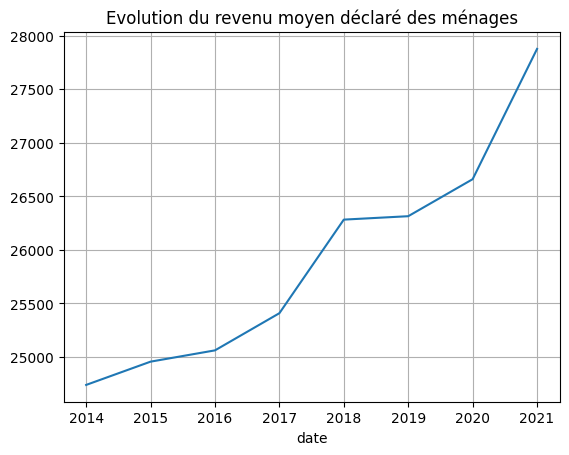

In [25]:
foyers_fiscaux.groupby('date')['revenu_fiscal_moyen'].mean().plot()
plt.grid()
plt.title("Evolution du revenu moyen déclaré des ménages")

### Indice de référence des loyers

In [26]:
indice_reference_loyers = pd.read_csv('data/indice_reference_loyers.csv')
indice_reference_loyers.head()

,date,IRL
0,2023-09-30,141.03
1,2023-06-30,140.59
2,2023-03-31,138.61
3,2022-12-31,137.26
4,2022-09-30,136.27


In [27]:
indice_reference_loyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    84 non-null     object 
 1   IRL     84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [28]:
indice_reference_loyers.describe()

,IRL
count,84.000000
mean,121.987024
std,8.815090
min,105.610000
25%,114.915000
50%,124.345000
75%,127.940000
max,141.030000


In [29]:
indice_reference_loyers['date'] = pd.to_datetime(indice_reference_loyers['date'])

Text(0.5, 1.0, "Evolution de l'indice de référence des loyers")

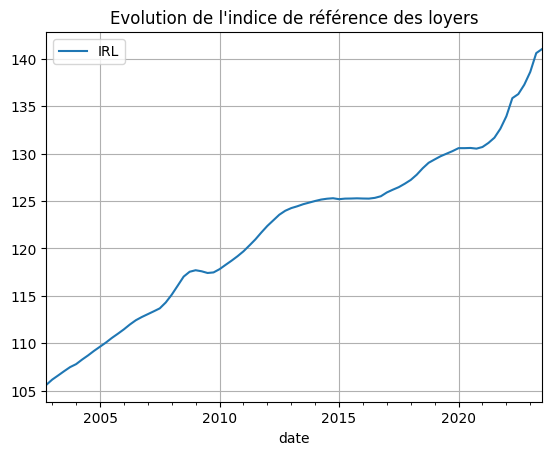

In [30]:
indice_reference_loyers.plot(x='date')
plt.grid(True)
plt.title("Evolution de l'indice de référence des loyers")

### Loyers

La table des loyers ne fait apparaitre que 2018 et 2022

In [31]:
loyers = pd.read_csv('data/loyers.csv')
loyers.head()

,departement,id_ville,ville,date,loyer_m2_appartement,loyer_m2_maison
0,1,1,L'Abergement-Clémenciat,2018,9.372335,8.191701
1,1,2,L'Abergement-de-Varey,2018,8.635552,7.441199
2,1,4,Ambérieu-en-Bugey,2018,10.074507,8.411184
3,1,5,Ambérieux-en-Dombes,2018,9.372335,9.039551
4,1,6,Ambléon,2018,8.966955,8.058265


In [32]:
loyers.groupby('date')[['loyer_m2_appartement', 'loyer_m2_maison']].mean()

,loyer_m2_appartement,loyer_m2_maison
date,,
2018,9.008120,7.461193
2022,9.384527,8.195775


In [33]:
loyers['date'].unique()

array([2018, 2022], dtype=int64)

### Parc immobilier

la table parc immobilier ne fait ressortir que les années 2019 et 2020

In [34]:
parc_immobilier = pd.read_csv('data/parc_immobilier.csv')
parc_immobilier.head()

,date,departement,id_ville,ville,n_logements,n_logements_vacants
0,2019,01,4,Ambérieu-en-Bugey,NaN,565.0
1,2019,01,7,Ambronay,NaN,78.0
2,2019,01,10,Anglefort,NaN,64.0
3,2019,01,14,Arbent,NaN,86.0
4,2019,01,15,Arboys en Bugey,NaN,33.0


In [35]:
parc_immobilier.groupby(parc_immobilier['date'])['n_logements_vacants'].sum()

date
2019    2689115.0
2020    2778729.0
2021          0.0
Name: n_logements_vacants, dtype: float64

In [36]:
parc_immobilier['date'].nunique()

3

### Taux d'endettement

In [37]:
taux_endettement = pd.read_csv('data/taux_endettement.csv')
taux_endettement.head()

,date,taux_endettement
0,2011,84.43
1,2012,85.37
2,2013,87.56
3,2014,87.86
4,2015,89.52


Text(0.5, 1.0, "Evolution de l'endettement des ménages")

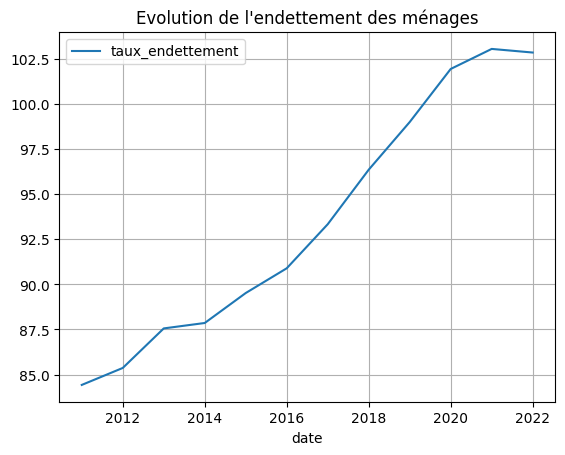

In [38]:
taux_endettement.plot(x='date')
plt.grid(True)
plt.title("Evolution de l'endettement des ménages")

### Taux d'intêret

In [39]:
taux_interet = pd.read_csv('data/taux_interet.csv')
print(taux_interet.head())


         date  taux
0  2023-10-31  3.87
1  2023-09-30  3.73
2  2023-08-31  3.62
3  2023-07-31  3.43
4  2023-06-30  3.25


In [40]:
taux_interet['date']=pd.to_datetime(taux_interet['date'])

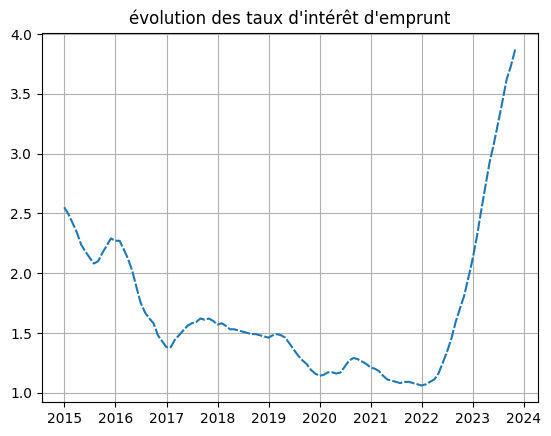

In [41]:
plt.plot(taux_interet['date'], taux_interet['taux'], linestyle = (0,(5,1)))
plt.title("évolution des taux d'intérêt d'emprunt")
plt.grid(True)


### Transactions

In [42]:
transaction = np.load('data/transactions.npz')
print("Clés disponibles dans le fichier npz:", transaction.files)

# Boucler sur chaque clé pour afficher la taille de chaque tableau
for key in transaction.files:
    # transaction[key] accède au tableau NumPy associé à la clé
    print(f"Taille de {key}: {transaction[key].shape}")

Clés disponibles dans le fichier npz: ['id_transaction', 'date_transaction', 'prix', 'departement', 'id_ville', 'ville', 'code_postal', 'adresse', 'type_batiment', 'vefa', 'n_pieces', 'surface_habitable', 'id_parcelle_cadastre', 'latitude', 'longitude', 'surface_dependances', 'surface_locaux_industriels', 'surface_terrains_agricoles', 'surface_terrains_sols', 'surface_terrains_nature']
Taille de id_transaction: (8318280,)
Taille de date_transaction: (8318280,)
Taille de prix: (8318280,)
Taille de departement: (25038689,)
Taille de id_ville: (8318280,)
Taille de ville: (99664044,)
Taille de code_postal: (8318280,)
Taille de adresse: (167154686,)
Taille de type_batiment: (76761974,)
Taille de vefa: (8318280,)
Taille de n_pieces: (8318280,)
Taille de surface_habitable: (8318280,)
Taille de id_parcelle_cadastre: (124774199,)
Taille de latitude: (8318280,)
Taille de longitude: (8318280,)
Taille de surface_dependances: (29933185,)
Taille de surface_locaux_industriels: (25445296,)
Taille de s

In [43]:
filtered_arrays = {}

for key in transaction.files:
    if transaction[key].shape[0] == 8318280:  # Vérifier si le nombre de lignes correspond
        filtered_arrays[key] = transaction[key]

transactions = pd.DataFrame(filtered_arrays)
transactions.head()

,id_transaction,date_transaction,prix,id_ville,code_postal,vefa,n_pieces,surface_habitable,latitude,longitude
0,126289,2014-01-02,197000.0,427,1600,False,4,84,45.942301,4.770694
1,126606,2014-01-02,157500.0,451,1440,False,4,103,46.236407,5.262935
2,123875,2014-01-02,112000.0,365,1290,False,3,78,46.260087,4.918587
3,130652,2014-01-02,173020.0,202,1150,False,4,72,45.899056,5.354210
4,132775,2014-01-03,49023.3,27,1360,False,5,105,45.832127,5.097926


In [44]:
print(taux_interet.head())
print(transactions.head())

        date  taux
0 2023-10-31  3.87
1 2023-09-30  3.73
2 2023-08-31  3.62
3 2023-07-31  3.43
4 2023-06-30  3.25
   id_transaction date_transaction      prix  id_ville  code_postal   vefa  \
0          126289       2014-01-02  197000.0       427         1600  False   
1          126606       2014-01-02  157500.0       451         1440  False   
2          123875       2014-01-02  112000.0       365         1290  False   
3          130652       2014-01-02  173020.0       202         1150  False   
4          132775       2014-01-03   49023.3        27         1360  False   

   n_pieces  surface_habitable   latitude  longitude  
0         4                 84  45.942301   4.770694  
1         4                103  46.236407   5.262935  
2         3                 78  46.260087   4.918587  
3         4                 72  45.899056   5.354210  
4         5                105  45.832127   5.097926  


In [45]:

# Assurons-nous que le DataFrame est trié par date pour les opérations futures
taux_interet = taux_interet.sort_values(by='date')
# Extraire l'année et le mois de chaque date
transactions['année_mois'] = transactions['date_transaction'].dt.to_period('M')
taux_interet['année_mois'] = taux_interet['date'].dt.to_period('M')
# Jointure des DataFrames
transactions = pd.merge(transactions, taux_interet[['année_mois', 'taux']], on='année_mois', how='left')

# Suppression de la colonne 'année_mois' si elle n'est plus nécessaire
transactions.drop('année_mois', axis=1, inplace=True)


In [46]:
transactions

,id_transaction,date_transaction,prix,id_ville,code_postal,vefa,n_pieces,surface_habitable,latitude,longitude,taux
0,126289,2014-01-02,197000.0,427,1600,False,4,84,45.942301,4.770694,NaN
1,126606,2014-01-02,157500.0,451,1440,False,4,103,46.236407,5.262935,NaN
2,123875,2014-01-02,112000.0,365,1290,False,3,78,46.260087,4.918587,NaN
3,130652,2014-01-02,173020.0,202,1150,False,4,72,45.899056,5.354210,NaN
4,132775,2014-01-03,49023.3,27,1360,False,5,105,45.832127,5.097926,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8318275,13335446,2023-06-30,475310.0,11,97417,False,4,94,-20.889304,55.421183,3.25
8318276,13335781,2023-06-30,280000.0,13,97436,False,3,46,-21.171405,55.289859,3.25
8318277,13335592,2023-06-30,363500.0,16,97410,False,5,104,-21.335277,55.473754,3.25
8318278,13334957,2023-06-30,318000.0,11,97400,False,5,100,-20.919938,55.462151,3.25


In [47]:
transactions = transactions.dropna()
transactions

,id_transaction,date_transaction,prix,id_ville,code_postal,vefa,n_pieces,surface_habitable,latitude,longitude,taux
5199,130463,2014-12-01,200000.0,108,1270,False,5,115,46.386632,5.351503,2.55
5200,131354,2014-12-01,230000.0,141,1300,False,4,94,45.824796,5.673966,2.55
5201,130763,2014-12-01,118000.0,283,1100,False,3,90,46.261427,5.665573,2.55
5202,128794,2014-12-01,929000.0,143,1220,False,6,159,46.348864,6.143717,2.55
5203,132111,2014-12-01,227280.0,72,1250,False,4,82,46.180232,5.321355,2.55
...,...,...,...,...,...,...,...,...,...,...,...
8318275,13335446,2023-06-30,475310.0,11,97417,False,4,94,-20.889304,55.421183,3.25
8318276,13335781,2023-06-30,280000.0,13,97436,False,3,46,-21.171405,55.289859,3.25
8318277,13335592,2023-06-30,363500.0,16,97410,False,5,104,-21.335277,55.473754,3.25
8318278,13334957,2023-06-30,318000.0,11,97400,False,5,100,-20.919938,55.462151,3.25


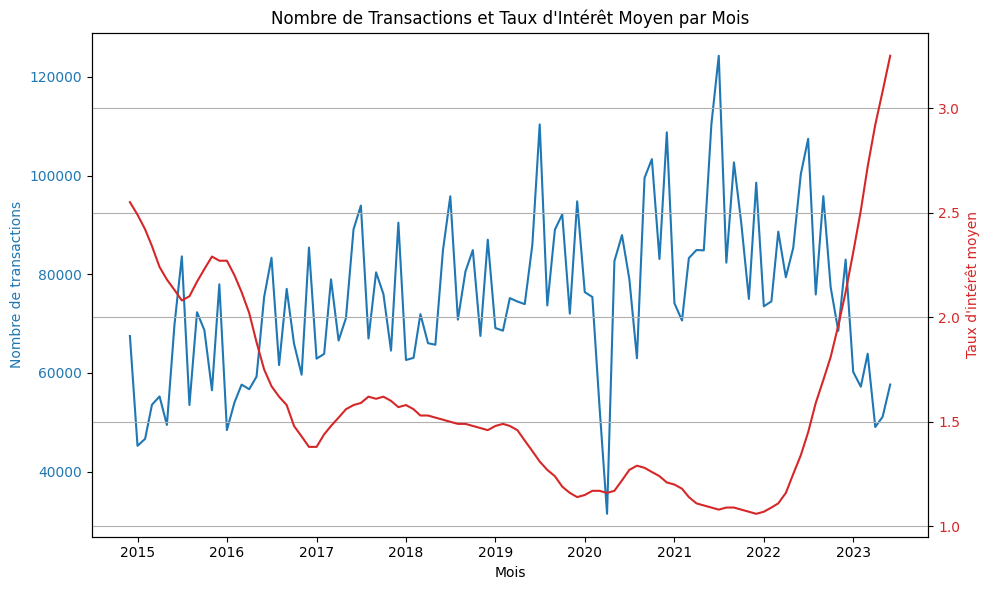

In [48]:
grouped = transactions.groupby(transactions['date_transaction'].dt.to_period('M')).agg(
    nombre_transactions=('id_transaction', 'count'),
    taux_moyen=('taux', 'mean')
)

# Reset l'index pour faciliter le tracé
grouped = grouped.reset_index()
grouped['date_transaction'] = grouped['date_transaction'].dt.to_timestamp()  # Convertir les périodes en timestamps pour le tracé

# Configurer le graphique
fig, ax1 = plt.subplots(figsize=(10, 6))

# Couleur pour la première ligne (nombre de transactions)
color = 'tab:blue'
ax1.set_xlabel('Mois')
ax1.set_ylabel('Nombre de transactions', color=color)
ax1.plot(grouped['date_transaction'], grouped['nombre_transactions'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Créer un second axe Y pour le taux d'intérêt moyen
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Taux d\'intérêt moyen', color=color)  # we already handled the x-label with ax1
ax2.plot(grouped['date_transaction'], grouped['taux_moyen'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Titre et affichage du graphique
plt.title('Nombre de Transactions et Taux d\'Intérêt Moyen par Mois')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()


Om peut remarquer que le nombre de transactions sur la pèriode suit une tendance inverse à l'évolution des taux d'intérêt.

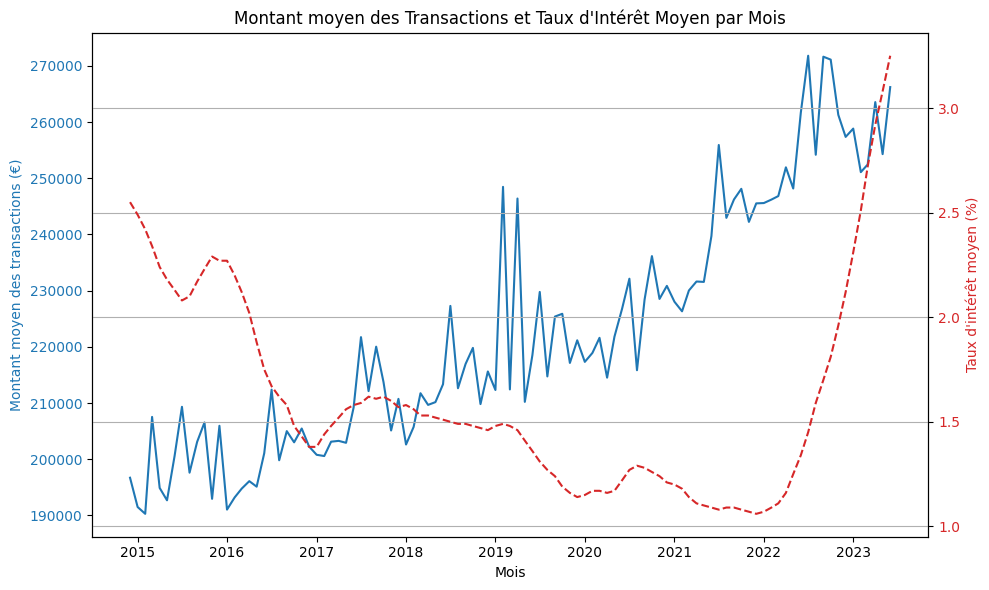

In [49]:
grouped = transactions.groupby(transactions['date_transaction'].dt.to_period('M')).agg(
    montant_total=('prix', 'mean'),  # Somme des montants de transactions par mois
    taux_moyen=('taux', 'mean')     # Moyenne des taux d'intérêt par mois
)

# Convertir les périodes en timestamps pour le tracé
grouped = grouped.reset_index()
grouped['date_transaction'] = grouped['date_transaction'].dt.to_timestamp()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Configuration du premier axe (montant total des transactions)
color = 'tab:blue'
ax1.set_xlabel('Mois')
ax1.set_ylabel('Montant moyen des transactions (€)', color=color)
ax1.plot(grouped['date_transaction'], grouped['montant_total'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Création du second axe pour le taux d'intérêt moyen
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Taux d\'intérêt moyen (%)', color=color)
ax2.plot(grouped['date_transaction'], grouped['taux_moyen'], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Ajout du titre et affichage du graphique
plt.title('Montant moyen des Transactions et Taux d\'Intérêt Moyen par Mois')
plt.grid()
fig.tight_layout()

Le prix de l'immobilier suit également une tendance inverse aux taux d'intérêts pour la période de 2015 à 2022.

Cette tendance n'est pas confirmée depuis 2022 où on constate une évolution des deux indicateurs dans la même direction.



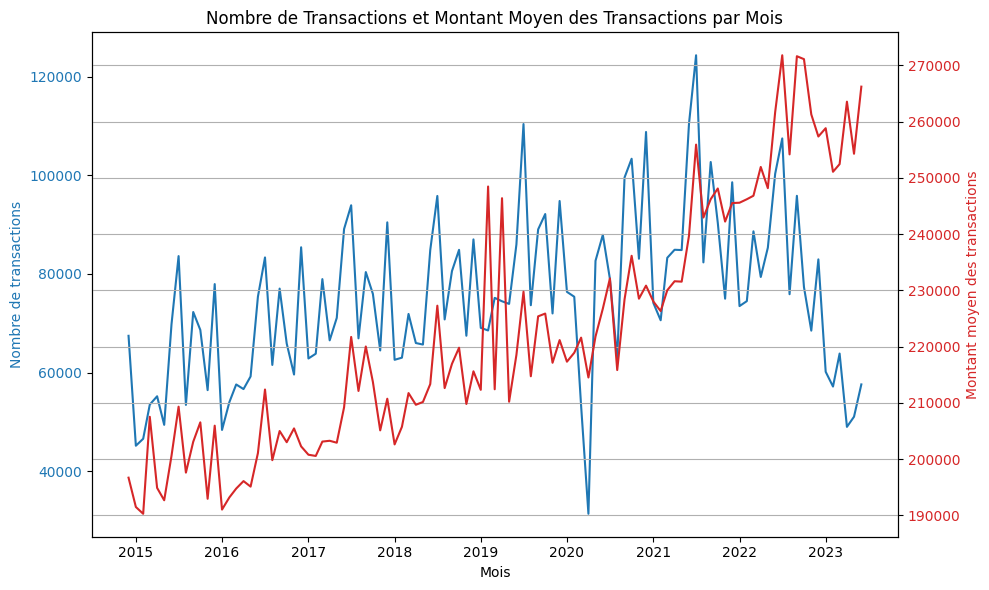

In [50]:
grouped = transactions.groupby(transactions['date_transaction'].dt.to_period('M')).agg(
    montant_moyen=('prix', 'mean'),  # Moyenne des montants de transactions par mois
    nombre_transactions=('id_transaction', 'count')  # Comptage du nombre de transactions par mois
)

grouped = grouped.reset_index()
grouped['date_transaction'] = grouped['date_transaction'].dt.to_timestamp()  # Convertir les périodes en timestamps pour le tracé

# Configuration du graphique
fig, ax1 = plt.subplots(figsize=(10, 6))

# Configuration de l'axe Y principal pour le nombre de transactions
color = 'tab:blue'
ax1.set_xlabel('Mois')
ax1.set_ylabel('Nombre de transactions', color=color)
ax1.plot(grouped['date_transaction'], grouped['nombre_transactions'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Création d'un second axe Y pour le montant moyen des transactions
ax2 = ax1.twinx()  # Création d'un second axe qui partage le même axe X
color = 'tab:red'
ax2.set_ylabel('Montant moyen des transactions', color=color) 
ax2.plot(grouped['date_transaction'], grouped['montant_moyen'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Titre et affichage du graphique
plt.title('Nombre de Transactions et Montant Moyen des Transactions par Mois')
fig.tight_layout()  # Ajustement automatique du layout pour éviter le chevauchement
plt.grid(True)  # Activation de la grille

On constate également une corrélation entre le nombre de transactions et le prix moyen de 2015 à 2022.

Cette corrélation s'inverse depuis 2022.

In [64]:
transactions.head()

,id_transaction,date_transaction,prix,id_ville,code_postal,vefa,n_pieces,surface_habitable,latitude,longitude,taux,année_mois
5199,130463,2014-12-01,200000.0,108,1270,False,5,115,46.386632,5.351503,2.55,2014-12
5200,131354,2014-12-01,230000.0,141,1300,False,4,94,45.824796,5.673966,2.55,2014-12
5201,130763,2014-12-01,118000.0,283,1100,False,3,90,46.261427,5.665573,2.55,2014-12
5202,128794,2014-12-01,929000.0,143,1220,False,6,159,46.348864,6.143717,2.55,2014-12
5203,132111,2014-12-01,227280.0,72,1250,False,4,82,46.180232,5.321355,2.55,2014-12


In [67]:
transactions['année_mois'] = transactions['date_transaction'].dt.to_period('M')

C:\Users\geoff\AppData\Local\Temp\ipykernel_21164\2119408743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['année_mois'] = transactions['date_transaction'].dt.to_period('M')


In [53]:
taux_interet.head()

,date,taux,année_mois
106,2014-12-31,2.55,2014-12
105,2015-01-31,2.49,2015-01
104,2015-02-28,2.42,2015-02
103,2015-03-31,2.34,2015-03
102,2015-04-30,2.24,2015-04


In [55]:
taux_interet.to_csv('taux_interets_csv.csv')
transactions.to_csv('transactions_csv.csv')